# classification.ipynb
__Author:__ Matthew Lesko-Krleza 260692352<br>
__Course:__ ECSE 415 Intro to Computer Vision<br>
__Deliverable:__ Assignment #2<br>
__Description:__ This notebook details the technical steps required for building a logo classification system.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os

# 3.1 Coding Questions
## Training
#### 1. Resize the training images to 128 x 128

In [2]:
"""This cell imports and resizes the dataset to 128 by 128"""
DIRECTORY = './dataset/'
SIZE = (128, 128)
images = os.listdir(DIRECTORY)
img_train, img_test, y_train_labels = [], [], []

# Import and resize images
for i in range(0, len(images)):
    name = images[i]
    img = cv2.imread(DIRECTORY + name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, SIZE)
    if "train" in name:
        img_train.append(img)
        label = "1" if "ford" in name else "-1"
        y_train_labels.append(label)
    else :
        img_test.append(img)
img_train = np.asarray(img_train)
img_test = np.asarray(img_test)

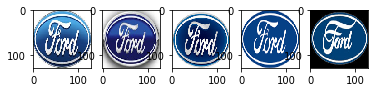

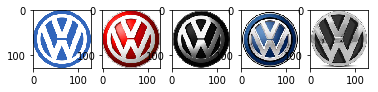

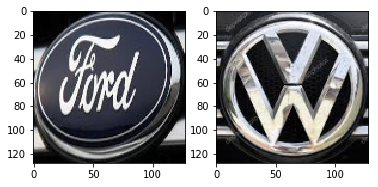

In [3]:
"""This cell displays the imported and resized data set for visual comparison. As one can see, the images are of size 128 x 128"""
plt.subplot(151)
plt.imshow(img_train[0])
plt.subplot(152)
plt.imshow(img_train[1])
plt.subplot(153)
plt.imshow(img_train[2])
plt.subplot(154)
plt.imshow(img_train[3])
plt.subplot(155)
plt.imshow(img_train[4])
plt.show()
plt.subplot(151)
plt.imshow(img_train[5])
plt.subplot(152)
plt.imshow(img_train[6])
plt.subplot(153)
plt.imshow(img_train[7])
plt.subplot(154)
plt.imshow(img_train[8])
plt.subplot(155)
plt.imshow(img_train[9])
plt.show()
plt.subplot(121)
plt.imshow(img_test[0])
plt.subplot(122)
plt.imshow(img_test[1])
plt.show()

#### 2a. Define a function for computing HoG features

In [4]:
"""This cell defines a function for computing a HoG descriptor given an image"""
def computeHog(img, cell_size=(4, 4), block_size=(4, 4), nbins=8):
    """
    @brief Compute the HoG descriptor for a an image and return a the corresponding HoG descriptor
    @param img The image you wish to compute the HoG for
    @param cell_size The size of the cell you wish to compute
    @param block_size The amount of cells you wish to have per block
    @param nbins Number of histogram bins for each block
    """
    # Required to convert to grayscale for generating HoG descriptors
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Create a HoG object
    hog_obj = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                          img.shape[0] // cell_size[0] * cell_size[0]),
                                _blockSize=(block_size[1] * cell_size[1],
                                            block_size[0] * cell_size[0]),
                                _blockStride=(cell_size[1], cell_size[0]),
                                _cellSize=(cell_size[1], cell_size[0]),
                                _nbins=nbins)
    
    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
    hog_desc =  hog_obj.compute(img)\
                       .reshape(n_cells[1] - block_size[1] + 1,
                            n_cells[0] - block_size[0] + 1,
                            block_size[0], block_size[1], nbins) \
                       .transpose((1, 0, 2, 3, 4))
    
    # Define BlockNorm
    gradients = np.full((n_cells[0], n_cells[1], nbins), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_desc[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

    # Normalize gradients
    gradients /= cell_count
    return gradients

#### 2b. Compute HoG features

In [5]:
"""This cell computes the HoG features for the training images"""
x_train_hog = []
for img in img_train:
    x_train_hog.append(computeHog(img))
x_train_hog = np.asarray(x_train_hog)

#### 3. Fit a nearest classifier with three neighbors

In [6]:
"""This cell fits a KNeighbors Classifier of k = 3 with the HoG features of the training images with their respective labels"""
# KNeighbors classifier 
kn_classfier = KNeighborsClassifier(n_neighbors=3)

# Reshape the x data for fitting so that it may be used for classification
x_train_hog = x_train_hog.reshape(10, -1)

kn_classfier.fit(x_train_hog, y_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Testing
#### 1. Resize images to 128x128
Resizing of test images already computed previously

#### 2. Compute HoG features for testing

In [7]:
"""This cell computes the HoG features for the testing images"""
x_test_hog = []
for img in img_test:
    x_test_hog.append(computeHog(img))

#### 3. Display HoG features for both test images

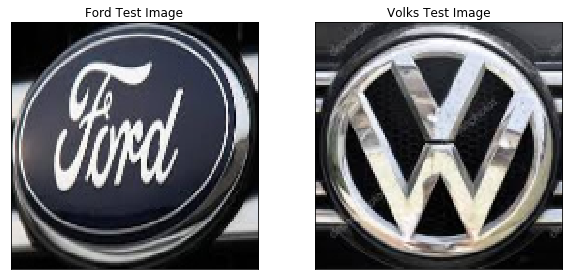

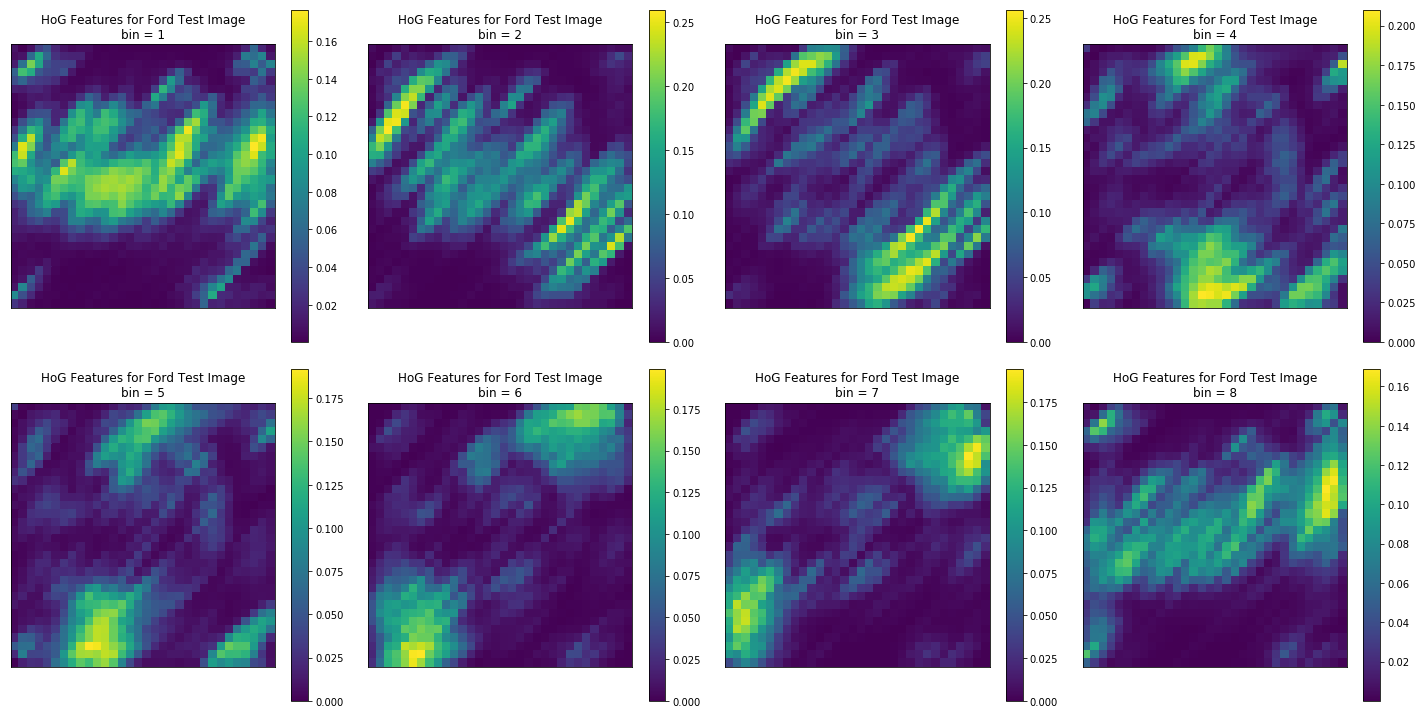

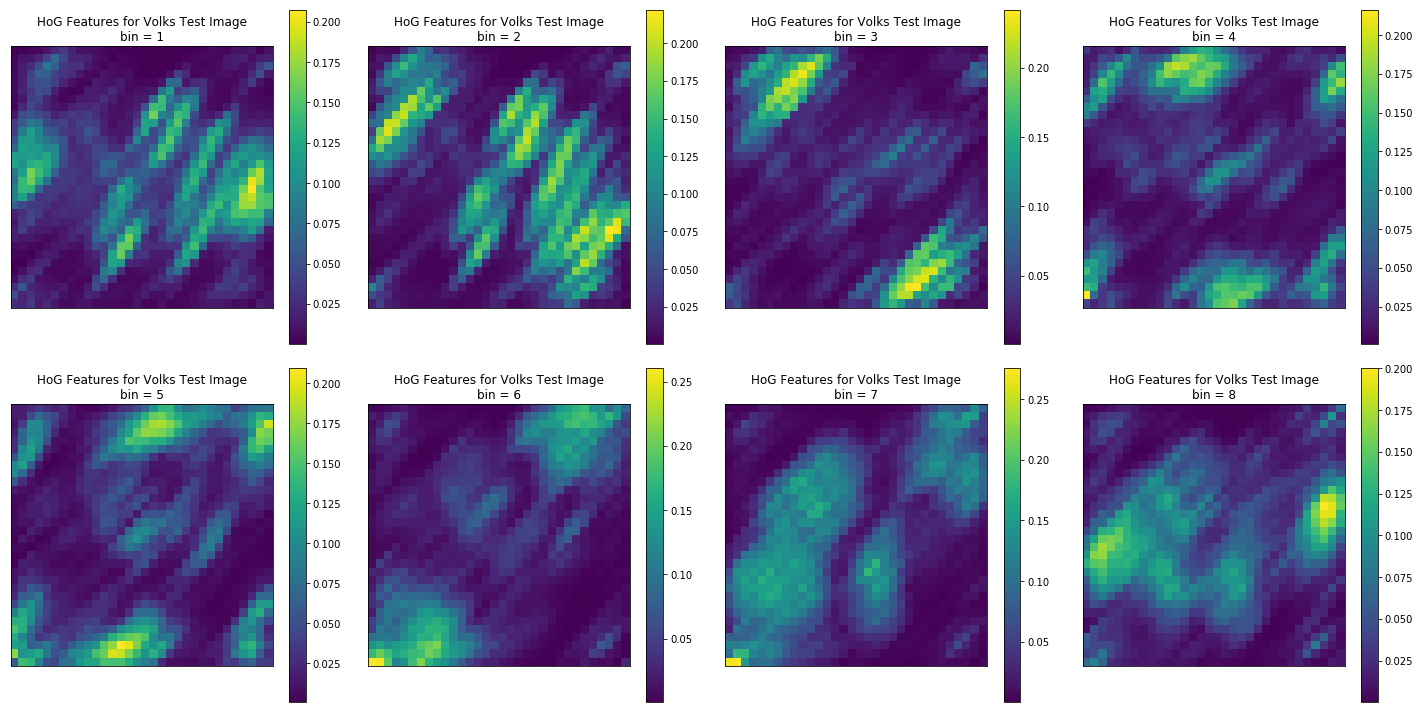

In [8]:
"""This cell displays the HoG features for the testing images"""
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.imshow(img_test[0], cmap='gray')
plt.title("Ford Test Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(img_test[1], cmap='gray')
plt.title("Volks Test Image"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize = (20, 20))
for nbin in range(0, 8):
    pos = 441 + nbin
    plt.subplot(pos)
    plt.pcolor(x_test_hog[0][:, :, nbin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(str.format("HoG Features for Ford Test Image\nbin = {}", nbin + 1)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure(figsize = (20, 20))
for nbin in range(0, 8):
    pos = 441 + nbin
    plt.subplot(pos)
    plt.pcolor(x_test_hog[1][:, :, nbin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(str.format("HoG Features for Volks Test Image\nbin = {}", nbin + 1)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
plt.tight_layout()
plt.show()

#### 4. Classify test images using the classifier built

In [9]:
"""This cell classifies the test images with the trained classifer"""
x_test_hog = np.asarray(x_test_hog)
x_test_hog = x_test_hog.reshape(x_test_hog.shape[0], -1)
label_classified = kn_classfier.predict(x_test_hog)
print(label_classified)

['1' '-1']


As one can see, the classifier has successfully predicted the first image as a ford logo (label '1') and the second photo as a volks logo (label '-1').

## 3.2 Reasoning Questions
#### Question 1.
HoG will not work if the logos undergo random rotation. This is because HoG is not a rotation-scale invariant descriptor. To regain uniform orientation of the logos, one can compute the SIFT keypoints for a non-rotated image, this would be used for ground truth. Given a rotated image, one can compute the SIFT keypoints of the rotated image, __match__ them with the non-rotated image, sort the matches by ascending distance, and take the 20 closest pairs. Once matching is complete, one can rotate the rotated image until the matched keypoints are aligned with that of the non-rotated image. So that the lines between the matched keypoints are parallel to one another. This would effectively preprocess rotated images so that HoG descriptors can be computed accurately.
#### Question 2.
One gradient would be sufficient to classify the image into three categories. I could use one gradient directed either in the x direction or the y direction. If I set my gradient for the x direction, my classifier would detect the forward and backward slash in the photos because a gradient in the x direction isn't parallel to any of the lines, so none of the lines would go unnoticed. A similar proof can be done for the y direction. If my classifier detects that there is a backward and a forward in the photo then it will label it 1. If it detects only a forward slash, label it 2. If it detects only a backward slash, label it 3.